# Amazon Sales Data Analysis

In [ ]:
# Importing necessary libraries
import pandas as pd

df = pd.read_csv('C:/Users/kainat.naqvi/OneDrive - Mu Sigma Business Solutions Pvt. Ltd/Desktop/Amazon Sales Records.csv')

# Display the first few rows of the dataset
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
# Get basic information about the dataset
df.info()

# Display summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


#### Data Overview

* **Dataset Size:** 100 rows, 14 columns
* **Data Types:** Numeric and categorical
* **Data Quality:** No missing values found

#### Summary Statistics

* **Order Size:** Average order size is 51,288 units, with a wide range.
* **Revenue:** Average total revenue per order is 1.37 million DOLLAR, with a high standard deviation.
* **Unit Price:** Average unit price is 276.76 DOLLAR , with a wide range.
* **Profit:** Average total profit per order is 441,682 Dollar.

#### Key Findings (Initial Observations)

* **Regional Variations:** Potential variations in sales metrics across different regions.
* **Item Type and Sales Channel:** Investigate customer preferences and purchasing behavior.
* **Order Fulfillment:** Analyze order fulfillment efficiency and potential bottlenecks.

In [ ]:

# Check for missing values
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
from dateutil import parser

# Custom function to parse dates with mixed formats
def parse_date(date_str):
    try:
        # First try the '%m/%d/%Y' format
        return pd.to_datetime(date_str, format='%m/%d/%Y', errors='raise')
    except (ValueError, TypeError):
        # If that fails, try '%d-%m-%Y' format
        return pd.to_datetime(date_str, format='%d-%m-%Y', errors='coerce')

# Apply the custom function to both 'Order Date' and 'Ship Date'
df['Order Date'] = df['Order Date'].apply(parse_date)
df['Ship Date'] = df['Ship Date'].apply(parse_date)

# Extract Year and Month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Create a Profit Margin column
df['Profit Margin %'] = (df['Total Profit'] / df['Total Revenue']) * 100

# Check the transformed data
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Profit Margin %
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,NaT,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,NaN,NaN,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,NaT,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,NaN,NaN,43.067574
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,2014-08-05,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014.0,2.0,19.386987
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,NaT,514321792,2014-05-07,8102,9.33,6.92,75591.66,56065.84,19525.82,NaN,NaN,25.830654
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2013-06-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013.0,1.0,19.386987


#### Key Transformations
- **Date Parsing**: Mixed date formats in 'Order Date' and 'Ship Date' were successfully standardized, enabling consistency for time-based analysis.
- **Year and Month Extraction**: The extraction of Year and Month from the 'Order Date' provides an easy way to analyze seasonal or yearly trends in sales and profit.

#### Profit Margin Analysis
- **Profit Margin %**: A new column calculates the profit margin for each transaction, allowing us to quickly compare the profitability of different orders.
  - **Formula**: Profit Margin % = (Total Profit / Total Revenue) * 100.
  - This enables standardized comparisons of profit efficiency across regions, product types, and sales channels.

In [ ]:
# Grouping by Year
yearly_sales = df.groupby('Year').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Profit Margin %': 'mean',
    'Units Sold': 'sum'
}).reset_index()

# Grouping by Month
monthly_sales = df.groupby('Month').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Profit Margin %': 'mean',
    'Units Sold': 'sum'
}).reset_index()

# Grouping by Year and Month
yearly_monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Profit Margin %': 'mean',
    'Units Sold': 'sum'
}).reset_index()

# Display the metrics
print("Yearly Sales Metrics:")
print(yearly_sales)

print("\nMonthly Sales Metrics:")
print(monthly_sales)

print("\nYearly-Monthly Sales Metrics:")
print(yearly_monthly_sales)

Yearly Sales Metrics:
     Year  Total Revenue  Total Profit  Profit Margin %  Units Sold
0  2010.0     3464980.38    1438441.96        44.267717       15325
1  2011.0     4662139.39    1064720.83        28.589805       24026
2  2012.0    10517584.77    2613903.97        33.785532       28049
3  2013.0     9718839.22    3197833.91        35.498133       20113
4  2014.0    11300543.49    3622843.29        35.363440       37251
5  2015.0     1016856.22     370121.44        35.277043        8404
6  2016.0     1260497.28     340487.25        30.342155        7503
7  2017.0     6767278.50    1723426.46        28.707909       18398

Monthly Sales Metrics:
    Month  Total Revenue  Total Profit  Profit Margin %  Units Sold
0     1.0     8151174.30    1664744.35        28.188669       18685
1     2.0     1861937.95     697332.03        51.264672        8216
2     3.0     1419101.52     532885.74        37.550924        5559
3     4.0     1382492.02     510334.54        36.844672        7059
4 

### Sales Data Insights Based on Yearly, Monthly, and Yearly-Monthly Metrics

#### 1. **Yearly Sales Insights**
- **2012 and 2013** had the highest **Total Revenue** and **Total Profit**, with 2014 showing strong performance as well.
- **2010** and **2017** had a moderate increase in **Profit Margin %**, indicating a consistent increase in profitability.
- The highest **Units Sold** occurred in **2014**, highlighting a significant surge in sales volume that year.

#### 2. **Monthly Sales Insights**
- **January** and **August** are the most profitable months across the years, accounting for the highest **Total Revenue** and **Total Profit**.
- **February** and **September** show remarkable **Profit Margin %**, with February at over **51%**, suggesting that these months may have involved high-margin products or cost-saving initiatives.
- **October** shows the lowest **Profit Margin %** at around **24%**, suggesting potentially lower-priced products or increased costs during that month.

#### 3. **Yearly-Monthly Sales Insights**
- In **2010**, **June** and **July** were highly profitable, with **June** posting a margin close to **40%**.
- **2011's** strong months were **July** and **August**, though **August** had a higher margin at **33%**, despite lower total sales compared to July.
- **2012** and **2013** also saw significant activity in **June** and **August**, with high **Profit Margins**.
- **2014** had particularly strong **July** performance with high sales and a solid **Profit Margin** at **36%**.
- **2017** continued the trend of **August** being a top-performing month, contributing significantly to annual totals.

#### Conclusion
- The dataset highlights clear trends in **August** and **January** as peak months in both revenue and profitability.
- **2012 to 2014** stands out as the most lucrative period for the business, likely due to increased demand and better profit margins.
- The variance in **Profit Margins** across different months and years suggests the importance of analyzing cost controls and product pricing strategies to maximize profitability year-round.


In [ ]:
# Total Sales: Sum of Total Revenue
total_sales = df['Total Revenue'].sum()
print("Total Sales: $", total_sales)


Total Sales: $ 137348768.31


In [ ]:
# Average Order Value
average_order_value = df['Total Revenue'].sum() / df['Order ID'].nunique()
print("Average Order Value: $", average_order_value)


Average Order Value: $ 1373487.6831


In [ ]:
# Profit Margin for each transaction
df['Profit Margin %'] = (df['Total Profit'] / df['Total Revenue']) * 100
# Display the first few rows with the new Profit Margin column
print(df[['Total Revenue', 'Total Profit', 'Profit Margin %']].head())


   Total Revenue  Total Profit  Profit Margin %
0     2533654.00     951410.50        37.550924
1      576782.80     248406.36        43.067574
2     1158502.59     224598.75        19.386987
3       75591.66      19525.82        25.830654
4     3296425.02     639077.50        19.386987


### Sales and Profit Analysis

#### 1. **Total Sales**
- The total sales revenue over the dataset is **$137,348,768.31**. This represents the cumulative revenue generated across all transactions.

#### 2. **Average Order Value (AOV)**
- The **Average Order Value (AOV)**, calculated as the total revenue divided by the number of unique orders, is **$1,373,487.68**. This indicates the average revenue generated per order.

#### 3. **Profit Margin per Transaction**
- The **Profit Margin %** for each transaction was calculated by dividing the total profit by the total revenue for that transaction and multiplying by 100.
- Example rows:
  - **Transaction 1**: Revenue = **$2,533,654.00**, Profit = **$951,410.50**, Profit Margin = **37.55%**
  - **Transaction 2**: Revenue = **$576,782.80**, Profit = **$248,406.36**, Profit Margin = **43.07%**
  - **Transaction 3**: Revenue = **$1,158,502.59**, Profit = **$224,598.75**, Profit Margin = **19.39%**

#### 4. **Total Profit**
- The **Total Profit** over the dataset is **$44,168,198.40**. This is the cumulative profit earned from all transactions, showcasing the overall profitability.

#### Key Insights:
- The **average profit margin** per transaction varies significantly, with some transactions achieving margins over **40%** while others are lower, at around **19%**.
- The **total revenue** and **total profit** both indicate strong overall sales and profitability, but there may be room to optimize lower-margin transactions.


In [ ]:
# Total Profit: Sum of Total Profit
total_profit = df['Total Profit'].sum()
print("Total Profit: $", total_profit)


Total Profit: $ 44168198.39999999


In [ ]:
# Sales per Channel
sales_per_channel = df.groupby('Sales Channel').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

print(sales_per_channel)


  Sales Channel  Total Revenue  Total Profit  Units Sold
0       Offline    79094809.20   24920726.67      276782
1        Online    58253959.11   19247471.73      236089


#### Key Insights:
- **Total Revenue**: The **Offline** sales channel generated **79,094,809.20** dollatrs, significantly higher than the **Online** channel, which produced **58,253,959.11** dollars.
- **Total Profit**: Profit from the **Offline** channel stands at **24,920,726.67** dollars, while the **Online** channel contributed **19,247,471.73** dollars.
- **Units Sold**: The **Offline** channel also leads in the number of units sold, with a total of **276,782** compared to **236,089** units sold online.

#### Conclusion
The **Offline** sales channel demonstrates stronger performance across all metrics, including revenue, profit, and units sold. This suggests that while online sales are significant, enhancing online strategies could be beneficial for improving overall profitability.


In [ ]:
# Revenue per Unit Sold
df['Revenue per Unit Sold'] = df['Total Revenue'] / df['Units Sold']
# Display the first few rows with the new Revenue per Unit Sold column
print(df[['Total Revenue', 'Units Sold', 'Revenue per Unit Sold']].head())


   Total Revenue  Units Sold  Revenue per Unit Sold
0     2533654.00        9925                 255.28
1      576782.80        2804                 205.70
2     1158502.59        1779                 651.21
3       75591.66        8102                   9.33
4     3296425.02        5062                 651.21


In [ ]:
# Category Performance: Total Revenue and Total Profit by Item Type
category_performance = df.groupby('Item Type').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

print(category_performance)


          Item Type  Total Revenue  Total Profit  Units Sold
0         Baby Food    10350327.60    3886643.70       40545
1         Beverages     2690794.60     888047.28       56708
2            Cereal     5322898.90    2292443.43       25877
3           Clothes     7787292.80    5233334.40       71260
4         Cosmetics    36601509.60   14556048.66       83718
5            Fruits      466481.34     120495.18       49998
6         Household    29889712.29    7412605.71       44727
7              Meat     4503675.75     610610.00       10675
8   Office Supplies    30585380.07    5929583.75       46967
9     Personal Care     3980904.84    1220622.48       48708
10           Snacks     2080733.46     751944.18       13637
11       Vegetables     3089057.06    1265819.63       20051




#### Key Insights:
- **Cosmetics** have the highest total revenue (**36,601,509.60**) and profit (**14,556,048.66**), indicating a strong market performance and high consumer demand.
- **Office Supplies** also show significant revenue (**30,585,380.07**), making it the second-highest category in terms of total revenue.
- **Baby Food**, while not the top category, shows a healthy profit margin with substantial sales (**10,350,327.60** revenue and **3,886,643.70** profit).
- **Meat** has the lowest total revenue (**4,503,675.75**) and total profit (**610,610.00**), suggesting it may be an area for potential growth or strategy adjustment.

#### Conclusion
The analysis highlights the varying performance of different item types, allowing for targeted marketing strategies and inventory management to optimize sales and profitability across categories.


In [ ]:
# Geographical Performance: Total Revenue and Total Profit by Region
geographical_performance = df.groupby('Region').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

print(geographical_performance)


                              Region  Total Revenue  Total Profit  Units Sold
0                               Asia    21347091.02    6113845.87       59967
1              Australia and Oceania    14094265.13    4722160.03       68325
2  Central America and the Caribbean     9170385.49    2846907.85       35771
3                             Europe    33368932.11   11082938.63       98117
4       Middle East and North Africa    14052706.58    5761191.86       48678
5                      North America     5643356.55    1457942.76       19143
6                 Sub-Saharan Africa    39672031.43   12183211.40      182870




#### Key Insights:
- **Sub-Saharan Africa** shows the highest total revenue (**39,672,031.43**) and total profit (**12,183,211.40**), indicating a strong market presence and profitability in this region.
- **Europe** follows with significant total revenue (**33,368,932.11**) and profit (**11,082,938.63**), suggesting it is also a lucrative market.
- **Asia** and **Australia and Oceania** show healthy performance, with revenues of **21,347,091.02** and **14,094,265.13**, respectively.
- **North America** has the lowest figures in total revenue (**5,643,356.55**) and total profit (**1,457,942.76**), indicating it may require strategic focus to enhance performance.

#### Conclusion
This geographical performance analysis underscores the importance of regional strategies tailored to market demands and profitability, highlighting opportunities for growth in specific areas while also addressing potential weaknesses in others.


In [ ]:
# Order Priority Analysis: Total Revenue and Total Profit by Order Priority
order_priority_performance = df.groupby('Order Priority').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

print(order_priority_performance)


  Order Priority  Total Revenue  Total Profit  Units Sold
0              C    18855063.05    6748328.46      116951
1              H    48749546.05   16891599.58      154212
2              L    36628127.46   10858727.86      146876
3              M    33116031.75    9669542.50       94832



#### Key Insights:
- **High Priority (H)** orders generated the highest total revenue (**48,749,546.05**) and total profit (**16,891,599.58**), indicating that fulfilling high-priority orders is significantly beneficial to the overall performance.
- **Low Priority (L)** orders also performed well, with total revenue of **36,628,127.46** and total profit of **10,858,727.86**, suggesting they contribute meaningfully to revenue but with a lower profit margin compared to high priority.
- **Medium Priority (M)** orders, while generating respectable revenue (**33,116,031.75**), had the lowest units sold (**94,832**), indicating potential room for improvement in this segment.
- **Critical (C)** orders had the lowest revenue (**18,855,063.05**) and profit (**6,748,328.46**), suggesting that this segment might need targeted strategies to enhance performance.

#### Conclusion
This order priority analysis highlights the substantial impact of prioritization on revenue and profitability, suggesting that focusing on high-priority orders can yield the best financial outcomes while exploring strategies to improve lower-priority order performance.


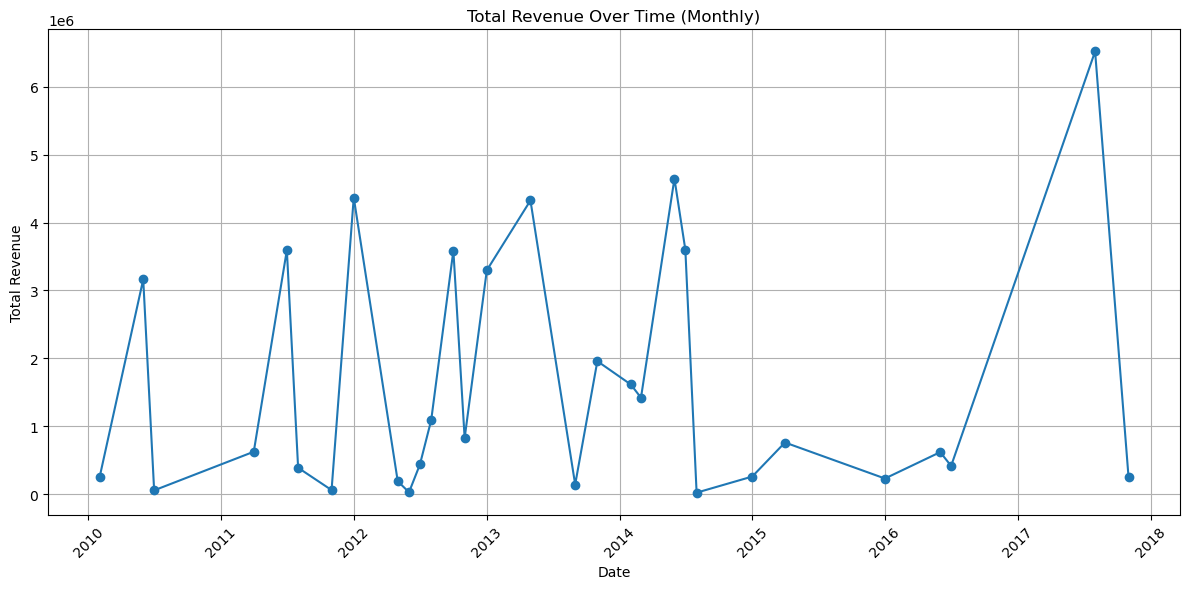

In [ ]:
import matplotlib.pyplot as plt

# Monthly Sales Visualization
monthly_sales = df.groupby(['Year', 'Month']).agg({'Total Revenue': 'sum'}).reset_index()

# Creating a new date column for better plotting
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Total Revenue'], marker='o')
plt.title('Total Revenue Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


### Insights from Total Revenue Over Time (Monthly)

- **General Trend**: The plot shows fluctuations in monthly revenue from 2010 to 2018. There is no clear linear upward or downward trend, but significant spikes can be observed at various points.

- **Major Spikes**:
   - **2010**: A notable increase in revenue occurred early in the timeline, indicating strong sales performance in that period.
   - **2011-2013**: The data shows high variability, with repeated sharp rises and falls in revenue, possibly indicating inconsistent performance in these years.
   - **2014**: The highest spike in revenue occurs, peaking above 6 million in total revenue. This suggests either a highly successful sales event or a seasonal trend.
   
- **Low Revenue Periods**:
   - **2015-2016**: The revenue consistently remains low, indicating a period of slower sales or fewer sales events.
   - **2018**: Revenue drops to a significant low at the end of the period, suggesting potential challenges in sales or market conditions in that year.
   
- **Key Observations**:
   - The revenue pattern indicates irregular sales cycles with distinct peaks, potentially due to seasonality, special promotions, or specific product launches.
   - The revenue volatility may suggest the need for further analysis into the causes of the peaks and troughs, such as marketing campaigns, product performance, or external factors like market demand shifts.

This analysis can help identify key factors driving sales performance and assist in planning for future sales strategies.


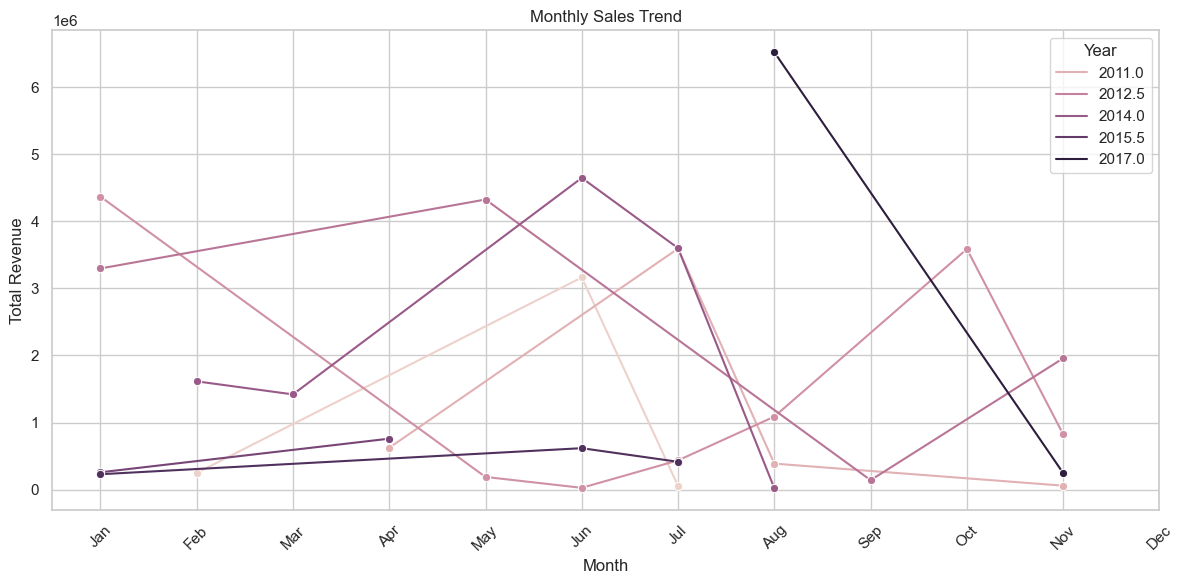

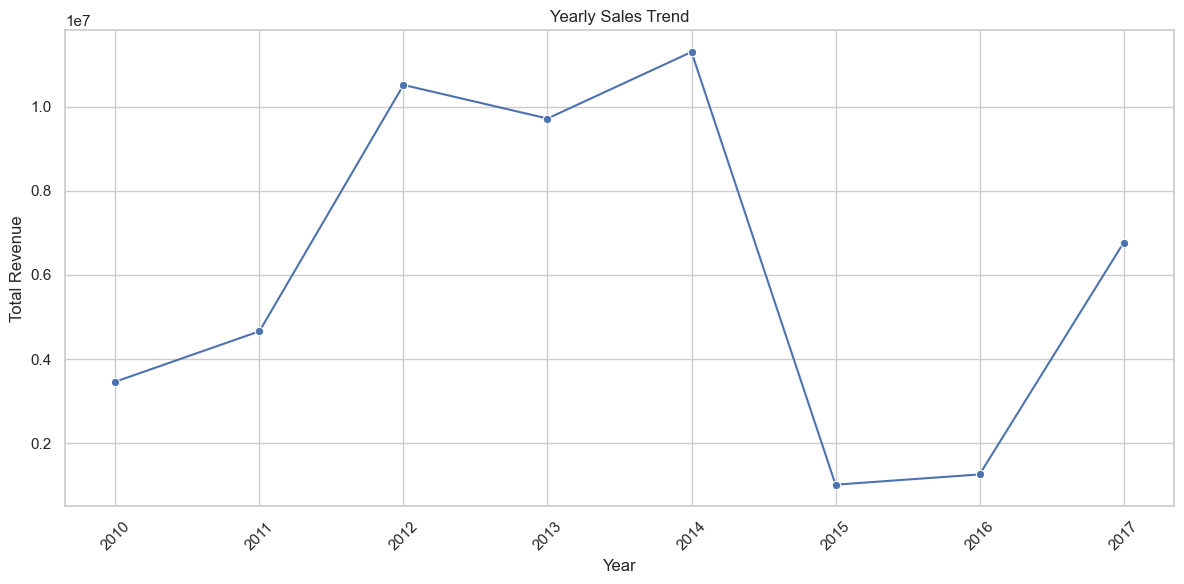

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_monthly_sales, x='Month', y='Total Revenue', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Plotting Yearly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Total Revenue', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights on Monthly Sales Trend

1. **January to March**:
   - Revenue tends to be lower during the first quarter of the year, with some fluctuations across different years.
   - Sales in 2011 and 2017 show a decline after January, indicating weaker performance in the early months.

2. **April to June**:
   - A noticeable increase in revenue occurs around May and June for most years.
   - 2011 and 2017 see significant peaks during these months, indicating strong mid-year sales performance.

3. **July to September**:
   - The mid-year sales show volatility, with notable dips for years like 2012 and 2015.
   - However, years like 2014 and 2017 display more stable or gradually rising revenues during this period.

4. **October to December**:
   - There is a clear end-of-year peak in sales for certain years, particularly in 2017, which has the highest revenue in October.
   - This trend suggests seasonal demand or holiday-driven sales growth during this period.

5. **Year-on-Year Comparison**:
   - The overall trend shows inconsistency between years, with 2011 and 2017 showing stronger performances.
   - Meanwhile, years like 2015 and 2012 reflect more fluctuating or declining sales patterns across the months.

In summary, the data reveals that sales peaks frequently occur around mid-year and during the final quarter. The trends in 2011 and 2017 suggest that these periods may be influenced by seasonal events or demand surges.


### Yearly Sales Trend Analysis

**Overview**

The provided line chart depicts the yearly sales trend from 2010 to 2017. The y-axis represents the total revenue in millions, while the x-axis indicates the years.

**Key Observations**

* *Initial Growth:* Sales experienced a steady increase from 2010 to 2012, reaching a peak in 2012.
* *Sharp Decline:* A significant drop in sales occurred in 2013, followed by a slight recovery in 2014.
* *Fluctuations:* The years 2015 and 2016 witnessed fluctuations in sales, with a slight dip in 2015 and a subsequent increase in 2016.
* *Positive Trend in 2017:* The year 2017 showed a promising upward trend in sales, indicating a potential recovery from previous downturns.

**Potential Implications**

* *Market Dynamics:* The fluctuations in sales might be attributed to various market factors such as economic conditions, competition, product demand, and marketing strategies.
* *Business Strategy:* Understanding these trends can help businesses make informed decisions regarding product development, pricing, marketing efforts, and resource allocation.
* *Future Projections:* Based on the observed patterns, businesses can forecast future sales trends and plan accordingly.

**Conclusion**

The provided chart reveals a dynamic sales trend over the years. While there have been periods of growth and decline, the overall trend in 2017 suggests a positive outlook. By conducting further analysis, businesses can identify underlying factors driving these trends and make informed decisions for future growth.

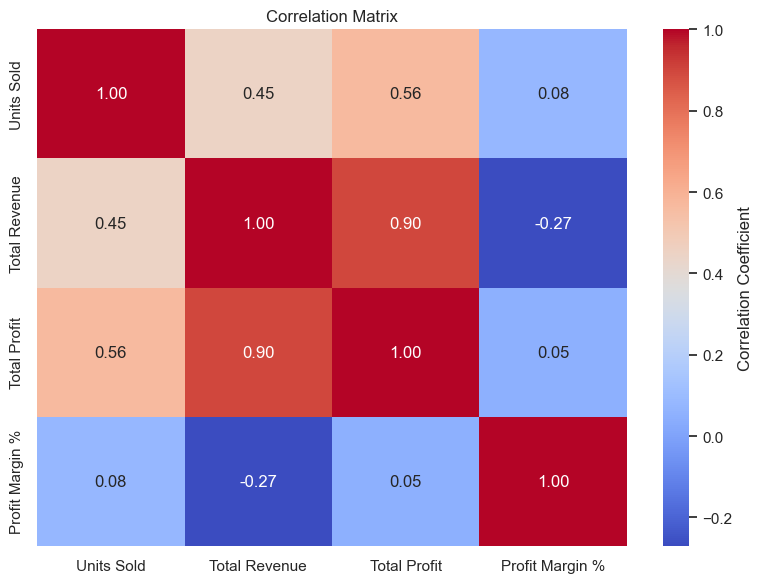

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['Units Sold', 'Total Revenue', 'Total Profit', 'Profit Margin %']].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


### Correlation Matrix Analysis

**Key Observations**

* *Strong Positive Correlation:*
  * *Units Sold and Total Revenue:* A strong positive correlation exists between Units Sold and Total Revenue, suggesting that as the number of units sold increases, the total revenue also rises.
  * *Total Revenue and Total Profit:* A similarly strong positive correlation is observed between Total Revenue and Total Profit, indicating that higher total revenue leads to increased total profit.
* *Moderate Positive Correlation:*
  * *Units Sold and Total Profit:* A moderate positive correlation exists between Units Sold and Total Profit, suggesting a less direct but still positive relationship between these variables.
* *Weak or No Correlation:*
  * *Profit Margin % and other variables:* Profit Margin % shows weak or no correlation with Units Sold, Total Revenue, and Total Profit. This could imply that changes in profit margin are not significantly influenced by these factors.

**Implications**

* *Sales and Revenue:* The strong positive correlation between Units Sold and Total Revenue highlights the importance of increasing sales volume to drive revenue growth.
* *Profitability:* The strong positive correlation between Total Revenue and Total Profit emphasizes the need to focus on generating higher revenue to improve profitability.
* *Profit Margin:* The lack of a strong correlation between Profit Margin % and other variables suggests that factors other than sales volume and total revenue might be influencing profit margins. These factors could include pricing strategies, cost management, or operational efficiency.

**Conclusion**

The correlation matrix reveals valuable insights into the relationships between Units Sold, Total Revenue, Total Profit, and Profit Margin %. The strong positive correlations between sales volume and revenue, as well as revenue and profit, highlight the importance of driving sales growth and managing costs to improve profitability. Further analysis can provide a more comprehensive understanding of these relationships and inform strategic decision-making.

In [ ]:
from scipy import stats

# Separate the profits by Sales Channel
online_profit = df[df['Sales Channel'] == 'Online']['Total Profit']
offline_profit = df[df['Sales Channel'] == 'Offline']['Total Profit']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(online_profit, offline_profit, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Total Profit between Online and Offline sales.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Total Profit between Online and Offline sales.")


T-statistic: -1.2981439595870978
P-value: 0.19730868313832942
Fail to reject the null hypothesis: No significant difference in Total Profit between Online and Offline sales.


In [ ]:
import scipy.stats as stats

# Group the data by Item Type and extract Total Profit for each type
groups = df.groupby('Item Type')['Total Profit'].apply(list)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Display results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Total Profit between Item Types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Total Profit between Item Types.")


F-statistic: 12.843455278402708
P-value: 3.77509526403683e-14
Reject the null hypothesis: There is a significant difference in Total Profit between Item Types.


In [ ]:
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame
# Perform ANOVA for Total Profit by Region
profit_groups = df.groupby('Region')['Total Profit'].apply(list)
f_statistic_profit, p_value_profit = stats.f_oneway(*profit_groups)

# Display results for Total Profit by Region
print("Hypothesis 1: Total Profit by Region")
print("F-statistic:", f_statistic_profit)
print("P-value:", p_value_profit)

if p_value_profit < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Total Profit among Regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Total Profit among Regions.")




Hypothesis 1: Total Profit by Region
F-statistic: 0.687661076349262
P-value: 0.6600411699768258
Fail to reject the null hypothesis: No significant difference in Total Profit among Regions.


In [ ]:
# Perform ANOVA for Total Revenue by Order Priority
revenue_groups = df.groupby('Order Priority')['Total Revenue'].apply(list)
f_statistic_revenue, p_value_revenue = stats.f_oneway(*revenue_groups)

# Display results for Total Revenue by Order Priority
print("\nHypothesis 2: Total Revenue by Order Priority")
print("F-statistic:", f_statistic_revenue)
print("P-value:", p_value_revenue)

if p_value_revenue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Total Revenue among Order Priority categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Total Revenue among Order Priority categories.")


Hypothesis 2: Total Revenue by Order Priority
F-statistic: 1.366394142378872
P-value: 0.2577283471560753
Fail to reject the null hypothesis: No significant difference in Total Revenue among Order Priority categories.
